#### Setup

In [15]:
# tokenization
import json
import MeCab
import import_ipynb
import thesis_preprocess
from stopwords.stopwords_ja import stop_words
from stopwords.stopwords_slothlib import stop_words_2

# word2vec
import gensim, logging

# plotting
from sklearn.manifold import TSNE               
import numpy as np                
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

#### Clean and Tokenize Tweets

In [2]:
# tokenize cleaned tweets into words
def tokenize(text):
    mt = MeCab.Tagger("-d /usr/local/lib/mecab/dic/mecab-ipadic-neologd")
    parsed = mt.parseToNode(text)
    components = []
    
    while parsed:
        word = parsed.surface
        pos = parsed.feature.split(",")[0]

        # remove beg/end tokens, particles, fillers, auxiliary bound prefixes/endings
        exclude_pos = ['BOS/EOS', '助詞', 'フィラー', '接頭詞', '助動詞']
        if pos not in exclude_pos: components.append(word)
        parsed = parsed.next
    
    # remove stopwords
    components = [token for token in components if ((not token in stop_words) and (not token in stop_words_2))]
    
    return components

In [16]:
# run preprocessing and tokenization for all tweets from given year dataset
def preprocess_tokenize_all(year):
    # store results and exception tweets
    tokens = []
    retweets = []
    not_parsed = []

    # iterate through tweets, preprocess and tokenize
    with open('datasets_general_years/'+ year + '-all.txt', 'r') as file:
        for line in file:
            tweet = json.loads(line)
            if line == None or tweet == None:
                not_parsed.append((line, tweet))
                print("Parsing error: ", line, tweet)
            elif tweet['retweetedTweet']:
                retweets.append(tweet)
                print("Retweet: ", tweet['id'])
            # filter out 2024 sponsored(?) tweets
            elif int(tweet['date'].split("-")[0]) < int(year) + 1: 
                tweet_text = tweet['rawContent'] # note: need other prop for over 140 char?
                processed = thesis_preprocess.preprocess(tweet_text)            
                components = tokenize(processed)
                tokens.append(components)

    file.close()
    return tokens, retweets, not_parsed

In [17]:
# run for 2015
tokens_2015, retweets_2015, not_parsed_2015 = preprocess_tokenize_all("2015")

# did we get retweets or errors?
print(len(retweets_2015))
print(len(not_parsed_2015))

0
0


In [18]:
len(tokens_2015)

499010

In [8]:
# run for 2022
tokens_2022, retweets_2022, not_parsed_2022 = preprocess_tokenize_all("2022")

# did we get retweets or errors?
print(len(retweets_2022))
print(len(not_parsed_2022))

0
0


#### Word2Vec

In [45]:
# train and save word2vec model for given year
def run_word2vec(year, tokens):
    logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
    model = gensim.models.Word2Vec(tokens, min_count=5)
    model.save("saved_w2v_models/w2v_model_" + year)

In [46]:
# train and save word2vec model for 2015 
run_word2vec("2015", tokens_2015)

2024-03-26 16:34:06,662 : INFO : collecting all words and their counts
2024-03-26 16:34:06,668 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2024-03-26 16:34:06,697 : INFO : PROGRESS: at sentence #10000, processed 56188 words, keeping 17946 word types
2024-03-26 16:34:06,725 : INFO : PROGRESS: at sentence #20000, processed 116418 words, keeping 28687 word types
2024-03-26 16:34:06,748 : INFO : PROGRESS: at sentence #30000, processed 174188 words, keeping 36993 word types
2024-03-26 16:34:06,770 : INFO : PROGRESS: at sentence #40000, processed 229421 words, keeping 43533 word types
2024-03-26 16:34:06,796 : INFO : PROGRESS: at sentence #50000, processed 284624 words, keeping 49608 word types
2024-03-26 16:34:06,816 : INFO : PROGRESS: at sentence #60000, processed 339367 words, keeping 55022 word types
2024-03-26 16:34:06,840 : INFO : PROGRESS: at sentence #70000, processed 400021 words, keeping 60729 word types
2024-03-26 16:34:06,863 : INFO : PROGRESS: at s

In [9]:
# train and save word2vec model for 2022
run_word2vec("2022", tokens_2022)

2023-12-27 14:18:56,026 : INFO : collecting all words and their counts
2023-12-27 14:18:56,028 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2023-12-27 14:18:56,047 : INFO : PROGRESS: at sentence #10000, processed 80462 words, keeping 16625 word types
2023-12-27 14:18:56,096 : INFO : PROGRESS: at sentence #20000, processed 159565 words, keeping 20951 word types
2023-12-27 14:18:56,117 : INFO : PROGRESS: at sentence #30000, processed 241422 words, keeping 32244 word types
2023-12-27 14:18:56,152 : INFO : PROGRESS: at sentence #40000, processed 319983 words, keeping 40793 word types
2023-12-27 14:18:56,186 : INFO : PROGRESS: at sentence #50000, processed 397617 words, keeping 44689 word types
2023-12-27 14:18:56,216 : INFO : PROGRESS: at sentence #60000, processed 479082 words, keeping 46657 word types
2023-12-27 14:18:56,249 : INFO : PROGRESS: at sentence #70000, processed 559626 words, keeping 51208 word types
2023-12-27 14:18:56,268 : INFO : PROGRESS: at s

In [23]:
# load trained word2vec model
model_2015 = gensim.models.Word2Vec.load("saved_w2v_models/w2v_model_2015")

# check similarity given by trained model
print(model_2015.wv.most_similar(positive='在日',topn=10))
print(model_2015.wv.most_similar(positive='外国人',topn=10))

2024-03-26 16:22:31,453 : INFO : loading Word2Vec object from saved_w2v_models/w2v_model_2015
2024-03-26 16:22:31,487 : INFO : loading wv recursively from saved_w2v_models/w2v_model_2015.wv.* with mmap=None
2024-03-26 16:22:31,493 : INFO : setting ignored attribute cum_table to None
2024-03-26 16:22:31,652 : INFO : Word2Vec lifecycle event {'fname': 'saved_w2v_models/w2v_model_2015', 'datetime': '2024-03-26T16:22:31.652575', 'gensim': '4.3.2', 'python': '3.11.5 (main, Aug 24 2023, 15:18:16) [Clang 14.0.3 (clang-1403.0.22.14.1)]', 'platform': 'macOS-14.3.1-x86_64-i386-64bit', 'event': 'loaded'}


[('人種差別', 0.9681127667427063), ('反日', 0.9560563564300537), ('自民', 0.9556175470352173), ('参院', 0.9535259008407593), ('拘束', 0.951295018196106), ('憲法違反', 0.9512634873390198), ('民主', 0.9504404067993164), ('非難', 0.9497846961021423), ('他国', 0.9497363567352295), ('民族', 0.9492263793945312)]
[('韓国人', 0.8849018812179565), ('人質事件', 0.8831086754798889), ('出身', 0.8805031776428223), ('アジア', 0.8722708821296692), ('記者', 0.8704305291175842), ('月給', 0.8682972192764282), ('専門家', 0.8682597279548645), ('中韓', 0.8673125505447388), ('維新', 0.8641927242279053), ('若者', 0.8639814853668213)]


In [11]:
# same for 2022
model_2022 = gensim.models.Word2Vec.load("saved_w2v_models/w2v_model_2022")

print(model_2022.wv.most_similar(positive='在日',topn=10))
print(model_2022.wv.most_similar(positive='外国人',topn=10))

2023-12-27 14:19:20,091 : INFO : loading Word2Vec object from thesis_w2v_2022_tweets
2023-12-27 14:19:20,133 : INFO : loading wv recursively from thesis_w2v_2022_tweets.wv.* with mmap=None
2023-12-27 14:19:20,133 : INFO : setting ignored attribute cum_table to None
2023-12-27 14:19:20,339 : INFO : Word2Vec lifecycle event {'fname': 'thesis_w2v_2022_tweets', 'datetime': '2023-12-27T14:19:20.339315', 'gensim': '4.3.2', 'python': '3.11.5 (main, Aug 24 2023, 15:18:16) [Clang 14.0.3 (clang-1403.0.22.14.1)]', 'platform': 'macOS-13.5-x86_64-i386-64bit', 'event': 'loaded'}


[('共産主義', 0.9306224584579468), ('併合', 0.9204510450363159), ('略奪', 0.9177254438400269), ('ナチス', 0.914193332195282), ('イラク', 0.9130715131759644), ('軍事力', 0.9127207398414612), ('従わ', 0.9111466407775879), ('人身売買', 0.9108579158782959), ('諸国', 0.9105721712112427), ('辺野古', 0.9075276255607605)]
[('中国人', 0.8970280885696411), ('自国', 0.894239604473114), ('欧米', 0.8910224437713623), ('中国', 0.8830902576446533), ('日本人', 0.8747531175613403), ('れいわ', 0.8741739988327026), ('イスラム教', 0.8676839470863342), ('独立', 0.8672612905502319), ('教会', 0.8656696677207947), ('カルト', 0.8599515557289124)]


#### Plot Word2Vec Findings

In [26]:
# https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html#sphx-glr-auto-examples-tutorials-run-word2vec-py

def reduce_dimensions(model):
    num_dimensions = 2

    # extract the words & their vectors, as numpy arrays
    vectors = np.asarray(model.wv.vectors)
    labels = np.asarray(model.wv.index_to_key)

    # reduce using t-SNE
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals

In [24]:
# plot similar words
# https://aneesha.medium.com/using-tsne-to-plot-a-subset-of-similar-words-from-word2vec-bb8eeaea6229 
# https://albertauyeung.github.io/2020/03/15/matplotlib-cjk-fonts.html/
# https://stackoverflow.com/questions/70268270/how-to-plot-tsne-on-word2vec-created-from-gensim-for-the-most-similar-20-cases

def plot_closest_words(word, model, x_vals, y_vals):
    labels = [i for i in model.wv.index_to_key]
    close_words = [i[0] for i in model.wv.most_similar(positive=word, topn=15)]

    fprop = fm.FontProperties(fname='NotoSansJP-VariableFont_wght.ttf')
    for word in close_words:
        i = labels.index(word)
        plt.scatter(x_vals[i],y_vals[i])
        plt.annotate(labels[i], xy=(x_vals[i], y_vals[i]), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom', fontproperties=fprop)

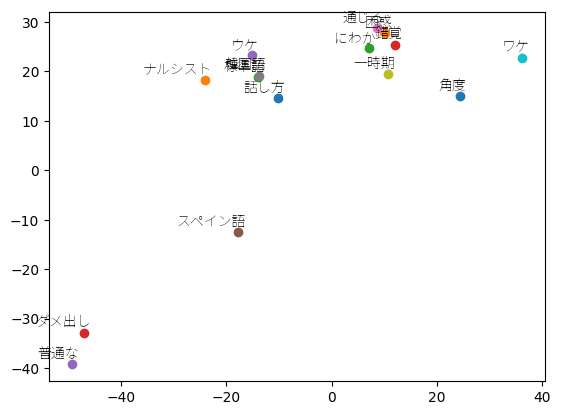

In [27]:
x_vals, y_vals = reduce_dimensions(model_2015)
plot_closest_words("外人", model_2015, x_vals, y_vals)

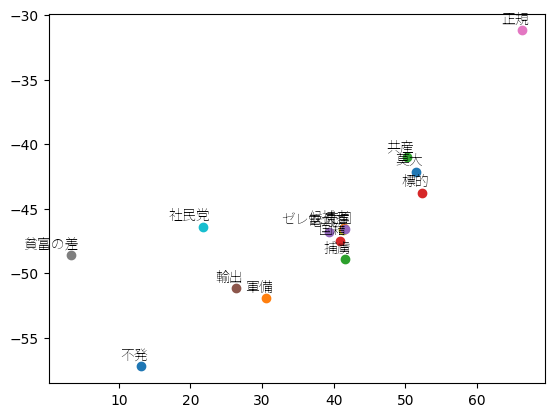

In [21]:
x_vals, y_vals = reduce_dimensions(model_2022)
plot_closest_words("外人", model_2022, x_vals, y_vals)

In [28]:
words = model_2015.wv.most_similar(positive="在日", topn=15)
for word in words:
    print(word[0])

人種差別
反日
自民
参院
拘束
憲法違反
民主
非難
他国
民族
安倍
公正
違憲
論争
公明


In [18]:
words = model_2022.wv.most_similar(positive="在日", topn=15)
for word in words:
    print(word[0])

共産主義
併合
略奪
ナチス
イラク
軍事力
従わ
人身売買
諸国
辺野古
クルド人
イスラム
ひろゆき
核
菅


In [29]:
common = model_2015.wv.index_to_key[:50]
for word in common:
    print(word)

てる
笑
いい
今日
ありがとう
やっ
おはよう
思っ
好き
すぎ
もう
ください
フォロ
み
ノ
くれ
言っ
寝
っ
明日
思う
トレクル
どう
行っ
無料
来
くん
出
まだ
食べ
行く
ちょっと
仕事
おは
くる
お願い
行き
可愛い
めっちゃ
そんな
良い
僕
映像
虫
よく
電
伝
大丈夫
言わ
昨日


In [23]:
common = model_2022.wv.index_to_key[:50]
for word in common:
    print(word)

てる
おはよう
ありがとう
今日
いい
ください
おは
くれ
思っ
参加
すぎ
好き
結果
笑
やっ
み
良い
寝
フォロ
お願い
明日
くん
来
もう
思う
朝
昨日
言っ
キャンペン
すぎる
行っ
出
楽しみ
動画
思い
応募
食べ
っ
仕事
どう
嬉しい
当たる
ござい
おめでとう
起き
可愛い
まだ
本当に
よろしくお願いします
残念


### W2V Similar Words - Minority Groups

In [30]:
def compare_similar_words(keyword:str, model_2015, model_2022):
    # 2015
    print("\nSimilar words to " + keyword + ": 2015")
    words_15 = model_2015.wv.most_similar(positive=keyword, topn=10)
    for w in words_15:
        print(w[0])

    # 2022
    words_22 = model_2022.wv.most_similar(positive=keyword, topn=10)
    print("\nSimilar words to " + keyword + ": 2022")
    for w in words_22:
        print(w[0])

In [36]:
model_2015 = gensim.models.Word2Vec.load("saved_w2v_models/w2v_model_2015")
model_2022 = gensim.models.Word2Vec.load("saved_w2v_models/w2v_model_2022")

2024-03-26 16:27:13,296 : INFO : loading Word2Vec object from saved_w2v_models/w2v_model_2015
2024-03-26 16:27:13,342 : INFO : loading wv recursively from saved_w2v_models/w2v_model_2015.wv.* with mmap=None
2024-03-26 16:27:13,343 : INFO : setting ignored attribute cum_table to None
2024-03-26 16:27:13,498 : INFO : Word2Vec lifecycle event {'fname': 'saved_w2v_models/w2v_model_2015', 'datetime': '2024-03-26T16:27:13.498879', 'gensim': '4.3.2', 'python': '3.11.5 (main, Aug 24 2023, 15:18:16) [Clang 14.0.3 (clang-1403.0.22.14.1)]', 'platform': 'macOS-14.3.1-x86_64-i386-64bit', 'event': 'loaded'}
2024-03-26 16:27:13,499 : INFO : loading Word2Vec object from saved_w2v_models/w2v_model_2022
2024-03-26 16:27:13,523 : INFO : loading wv recursively from saved_w2v_models/w2v_model_2022.wv.* with mmap=None
2024-03-26 16:27:13,523 : INFO : setting ignored attribute cum_table to None
2024-03-26 16:27:13,708 : INFO : Word2Vec lifecycle event {'fname': 'saved_w2v_models/w2v_model_2022', 'datetime': 

In [43]:
model_2022.wv.key_to_index

{'てる': 0,
 'おはよう': 1,
 'ありがとう': 2,
 '今日': 3,
 'いい': 4,
 'ください': 5,
 'おは': 6,
 'くれ': 7,
 '思っ': 8,
 '参加': 9,
 'すぎ': 10,
 '好き': 11,
 '結果': 12,
 '笑': 13,
 'やっ': 14,
 'み': 15,
 '良い': 16,
 '寝': 17,
 'フォロ': 18,
 'お願い': 19,
 '明日': 20,
 'くん': 21,
 '来': 22,
 'もう': 23,
 '思う': 24,
 '朝': 25,
 '昨日': 26,
 '言っ': 27,
 'キャンペン': 28,
 'すぎる': 29,
 '行っ': 30,
 '出': 31,
 '楽しみ': 32,
 '動画': 33,
 '思い': 34,
 '応募': 35,
 '食べ': 36,
 'っ': 37,
 '仕事': 38,
 'どう': 39,
 '嬉しい': 40,
 '当たる': 41,
 'ござい': 42,
 'おめでとう': 43,
 '起き': 44,
 '可愛い': 45,
 'まだ': 46,
 '本当に': 47,
 'よろしくお願いします': 48,
 '残念': 49,
 '素敵': 50,
 '凸': 51,
 '本日': 52,
 '配信': 53,
 'よろしく': 54,
 '可能': 55,
 '抽選': 56,
 'ぜひ': 57,
 'つけ': 58,
 'いつも': 59,
 '欲しい': 60,
 'めっちゃ': 61,
 '行く': 62,
 '頑張っ': 63,
 '最高': 64,
 'くる': 65,
 'こんな': 66,
 '行き': 67,
 'ちょっと': 68,
 '確認': 69,
 '待っ': 70,
 'チャンス': 71,
 'ハズレ': 72,
 '月日': 73,
 'くれる': 74,
 '最近': 75,
 'いただき': 76,
 '投稿': 77,
 'これから': 78,
 '開催': 79,
 '日本': 80,
 '良かっ': 81,
 '言わ': 82,
 'ちゃっ': 83,
 '声': 84,
 '致し': 85,
 'よく': 86,
 '交換': 87,
 

In [48]:
model_2015.wv.key_to_index

{'てる': 0,
 '笑': 1,
 'いい': 2,
 '今日': 3,
 'ありがとう': 4,
 'やっ': 5,
 'おはよう': 6,
 '思っ': 7,
 '好き': 8,
 'すぎ': 9,
 'もう': 10,
 'ください': 11,
 'フォロ': 12,
 'み': 13,
 'ノ': 14,
 'くれ': 15,
 '言っ': 16,
 '寝': 17,
 'っ': 18,
 '明日': 19,
 '思う': 20,
 'トレクル': 21,
 'どう': 22,
 '行っ': 23,
 '無料': 24,
 '来': 25,
 'くん': 26,
 '出': 27,
 'まだ': 28,
 '食べ': 29,
 '行く': 30,
 'ちょっと': 31,
 '仕事': 32,
 'おは': 33,
 'くる': 34,
 'お願い': 35,
 '行き': 36,
 '可愛い': 37,
 'めっちゃ': 38,
 'そんな': 39,
 '良い': 40,
 '僕': 41,
 '映像': 42,
 '虫': 43,
 'よく': 44,
 '電': 45,
 '伝': 46,
 '大丈夫': 47,
 '言わ': 48,
 '昨日': 49,
 'こんな': 50,
 '君': 51,
 '最近': 52,
 'やる': 53,
 '欲しい': 54,
 'ちゃう': 55,
 '楽しみ': 56,
 '位': 57,
 '思い': 58,
 '朝': 59,
 '言う': 60,
 '買っ': 61,
 'かわいい': 62,
 '起き': 63,
 '入っ': 64,
 '一緒': 65,
 'しまっ': 66,
 '見る': 67,
 '動画': 68,
 '早く': 69,
 'すぎる': 70,
 'ゲム': 71,
 '本当に': 72,
 '終わっ': 73,
 '招待': 74,
 '嬉しい': 75,
 '考え': 76,
 'よかっ': 77,
 'いつも': 78,
 'くれる': 79,
 'いく': 80,
 'いっ': 81,
 'うん': 82,
 'やばい': 83,
 'ちゃっ': 84,
 'おやすみ': 85,
 '顔': 86,
 '持っ': 87,
 '発見': 88,
 'よろしく': 8

In [47]:
# Zainichi Koreans
compare_similar_words("在日", model_2015, model_2022)
compare_similar_words("在日コリアン", model_2015, model_2022)


Similar words to 在日: 2015
人種差別
反日
自民
参院
拘束
憲法違反
民主
非難
他国
民族

Similar words to 在日: 2022
共産主義
併合
略奪
ナチス
イラク
軍事力
従わ
人身売買
諸国
辺野古

Similar words to 在日コリアン: 2015


KeyError: "Key '在日コリアン' not present in vocabulary"

In [38]:
# Ainu
compare_similar_words("アイヌ", model_2015, model_2022)


Similar words to アイヌ: 2015


KeyError: "Key 'アイヌ' not present in vocabulary"

In [39]:
# Okinawa
compare_similar_words("沖縄人", model_2015, model_2022)
compare_similar_words("琉球人", model_2015, model_2022)


Similar words to 沖縄人: 2015


KeyError: "Key '沖縄人' not present in vocabulary"

In [44]:
compare_similar_words("ハーフアップ", model_2015, model_2022)


Similar words to ハーフアップ: 2015


KeyError: "Key 'ハーフアップ' not present in vocabulary"

In [35]:
# Haafu
compare_similar_words("ハーフ", model_2015, model_2022)


Similar words to ハーフ: 2015


KeyError: "Key 'ハーフ' not present in vocabulary"